This is my notebook for the Sendy Logistic Challenge that I participated in hosted on Zindi. It is my fisrt time entering a hackathon and I am proud of what I managed to achieve. At the time of saving this notebook my submission is ranked 29 out of 206. 

In [247]:
#import my libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [248]:
#load my datasets
train = pd.read_csv('Train.csv')
riders = pd.read_csv('Riders.csv')
sample_submission = pd.read_csv('SampleSubmission.csv')
test = pd.read_csv('Test.csv')
variableDefinitions = pd.read_csv('VariableDefinitions.csv')

In [249]:
# print shape
print('train data shape :', train.shape)
print('test data shape :', test.shape)

train data shape : (21201, 29)
test data shape : (7068, 25)


In [250]:
#a look into the train dataset
train.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,30,2,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,5,9:43:06 AM,15,5,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,1,10:05:23 AM,13,1,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [251]:
#getting info about my dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order No                                   21201 non-null  object 
 1   User Id                                    21201 non-null  object 
 2   Vehicle Type                               21201 non-null  object 
 3   Platform Type                              21201 non-null  int64  
 4   Personal or Business                       21201 non-null  object 
 5   Placement - Day of Month                   21201 non-null  int64  
 6   Placement - Weekday (Mo = 1)               21201 non-null  int64  
 7   Placement - Time                           21201 non-null  object 
 8   Confirmation - Day of Month                21201 non-null  int64  
 9   Confirmation - Weekday (Mo = 1)            21201 non-null  int64  
 10  Confirmation - Time   

In [252]:
#getting info about my dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7068 entries, 0 to 7067
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Order No                              7068 non-null   object 
 1   User Id                               7068 non-null   object 
 2   Vehicle Type                          7068 non-null   object 
 3   Platform Type                         7068 non-null   int64  
 4   Personal or Business                  7068 non-null   object 
 5   Placement - Day of Month              7068 non-null   int64  
 6   Placement - Weekday (Mo = 1)          7068 non-null   int64  
 7   Placement - Time                      7068 non-null   object 
 8   Confirmation - Day of Month           7068 non-null   int64  
 9   Confirmation - Weekday (Mo = 1)       7068 non-null   int64  
 10  Confirmation - Time                   7068 non-null   object 
 11  Arrival at Pickup

In [253]:
#getting some summaries about my train dataframe
train.describe()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,16835.000000,552.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,2.752182,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,9.506533,23.258889,7.905797,-1.281470,36.811264,-1.282581,36.811220,1556.920947
std,0.625178,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,5.668963,3.615768,17.089971,0.030507,0.037473,0.034824,0.044721,987.270788
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.200000,0.100000,-1.438302,36.653621,-1.430298,36.606594,1.000000
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,20.600000,1.075000,-1.300921,36.784605,-1.301201,36.785661,882.000000
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.500000,2.900000,-1.279395,36.807040,-1.284382,36.808002,1369.000000
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,26.000000,4.900000,-1.257147,36.829741,-1.261177,36.829477,2040.000000
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,49.000000,32.100000,99.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000


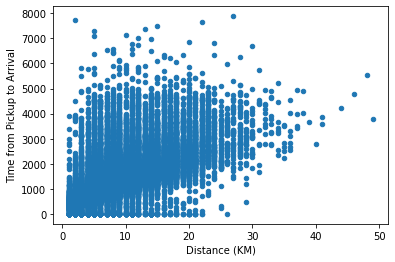

In [254]:
#relationship between distance and time
train.plot(kind = 'scatter', x = 'Distance (KM)', y = 'Time from Pickup to Arrival')
plt.show()

In [255]:
#a view of the riders dataset
riders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rider Id        960 non-null    object 
 1   No_Of_Orders    960 non-null    int64  
 2   Age             960 non-null    int64  
 3   Average_Rating  960 non-null    float64
 4   No_of_Ratings   960 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 37.6+ KB


In [256]:
#Merge the train and test datasets with the riders dataset
train = pd.merge(train,riders,on='Rider Id',how='left')
test = pd.merge(test,riders,on='Rider Id',how='left')

In [257]:
#drop the precipitation column "too many missing values"
train.drop('Precipitation in millimeters', axis=1, inplace=True)
test.drop('Precipitation in millimeters', axis=1, inplace=True)

In [258]:
#fill remaining missing values with the median
train.fillna(train.median(), inplace=True)
test.fillna(test.median(), inplace=True)

In [259]:
#looking at the test info again 
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7068 entries, 0 to 7067
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Order No                              7068 non-null   object 
 1   User Id                               7068 non-null   object 
 2   Vehicle Type                          7068 non-null   object 
 3   Platform Type                         7068 non-null   int64  
 4   Personal or Business                  7068 non-null   object 
 5   Placement - Day of Month              7068 non-null   int64  
 6   Placement - Weekday (Mo = 1)          7068 non-null   int64  
 7   Placement - Time                      7068 non-null   object 
 8   Confirmation - Day of Month           7068 non-null   int64  
 9   Confirmation - Weekday (Mo = 1)       7068 non-null   int64  
 10  Confirmation - Time                   7068 non-null   object 
 11  Arrival at Pickup

In [260]:
#choosing variables to include in my train and test
train2 = train.filter(['Personal or Business','Confirmation - Weekday (Mo = 1)','Arrival at Pickup - Weekday (Mo = 1)','Temperature','Distance (KM)','Average_Rating','No_Of_Orders','Age','Pickup Lat','Pickup Long','Destination Lat','Destination Long','Time from Pickup to Arrival'], axis=1)
test2 = test.filter(['Personal or Business','Confirmation - Weekday (Mo = 1)','Arrival at Pickup - Weekday (Mo = 1)','Temperature','Distance (KM)','Average_Rating','No_Of_Orders','Age','Pickup Lat','Pickup Long','Destination Lat','Destination Long'], axis=1)

In [261]:
#encoding my categorical data
train2 = pd.get_dummies(train2, columns=['Personal or Business'], drop_first=True)
test2 = pd.get_dummies(test2, columns=['Personal or Business'], drop_first=True)

In [262]:
#splitting my train dataset into a X and Y
X = train2.drop(['Time from Pickup to Arrival'], axis=1)
y = train2['Time from Pickup to Arrival']

In [263]:
#splitting my dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=50)

In [264]:
#fitting the linear regression model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [265]:
#fitting my xgboost model
xgboost = xgb.XGBRegressor()
xgboost.fit(X_train, y_train)

[07:16:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [266]:
#fitting my gradient boosting regressor model
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [267]:
#fitting the first test dataset into my three models to predict
lm_predict = lm.predict(X_test)
xb_predict = xgboost.predict(X_test)
gbr_predict = gbr.predict(X_test)

In [268]:
#calculating the root mean squared error(rmse) in my models
rmse_lm = mean_squared_error(y_test, lm_predict , squared=False)
rmse_xb = mean_squared_error(y_test, xb_predict , squared=False)
rmse_gbr = mean_squared_error(y_test, gbr_predict , squared=False)

In [269]:
rmse_lm

770.6333209365018

In [270]:
rmse_xb

738.1814652539354

In [271]:
rmse_gbr

738.6822291632662

In [272]:
#fitting my actual test dataset into the model with the lowest rmse
prediction_xb = xgboost.predict(test2)

In [273]:
#add my prediction values into the original test dataframe
test['Time from Pickup to Arrival'] = prediction_xb

In [274]:
#a view of my test dataframe after adding my predictions column
test.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Time from Pickup to Arrival
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,4:44:29 PM,27,3,4:53:04 PM,27,3,5:06:47 PM,8,23.4,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192,439,1511,13.3,171,1489.042725
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,12:59:17 PM,17,5,1:20:27 PM,17,5,1:25:37 PM,5,23.4,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868,488,273,14.4,45,1292.808716
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,11:25:05 AM,27,4,11:33:20 AM,27,4,11:57:54 AM,5,22.8,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26,833,460,13.1,67,1347.268311
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,1:53:27 PM,17,1,2:02:41 PM,17,1,2:16:52 PM,5,24.5,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685,487,560,13.7,44,1231.512329
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,11:34:45 AM,11,2,11:47:19 AM,11,2,11:56:04 AM,6,24.4,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858,4761,1120,14.1,1010,1216.424927


In [275]:
#round off my predictions
test['Time from Pickup to Arrival'] = test[['Time from Pickup to Arrival']].apply(pd.Series.round)

In [276]:
#look at the sample submission to see the shape
sample_submission.head()

,Order_No,Time from Pickup to Arrival
0,Order_No_19248,567.0
1,Order_No_12736,4903.0
2,Order_No_768,5649.0
3,Order_No_15332,NaN
4,Order_No_21373,NaN


In [277]:
#select the columns that I want for my submission
prediction = test.filter(['Order No','Time from Pickup to Arrival'], axis=1)

In [278]:
#look at my prediction to see if its same as sample submission
prediction.head()

,Order No,Time from Pickup to Arrival
0,Order_No_19248,1489.0
1,Order_No_12736,1293.0
2,Order_No_768,1347.0
3,Order_No_15332,1232.0
4,Order_No_21373,1216.0


In [279]:
#save my prediction into a csv file
prediction.to_csv('prediction14.csv',index=False)